In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
games = pd.read_csv('games.csv')
players = pd.read_csv('players.csv')
plays = pd.read_csv('plays.csv')
tackles = pd.read_csv('tackles.csv')
week1 = pd.read_csv('tracking_week_1.csv')
tracking = pd.read_csv('small_tracking_week_1.csv')


In [3]:
print(week1.shape)
print(tracking.shape)
print(tracking.shape)

(1407439, 17)
(1048575, 17)
(1048575, 17)


In [4]:
tracking.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2.022091e+09,56.0,35472.0,Rodger Saffold,1.0,24:05.2,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2.022091e+09,56.0,35472.0,Rodger Saffold,2.0,24:05.3,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2.022091e+09,56.0,35472.0,Rodger Saffold,3.0,24:05.4,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN
3,2.022091e+09,56.0,35472.0,Rodger Saffold,4.0,24:05.5,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN
4,2.022091e+09,56.0,35472.0,Rodger Saffold,5.0,24:05.6,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN


In [5]:
missing_values = tracking.isnull().sum()
missing_values[missing_values > 0]

gameId           1038577
playId           1038577
nflId            1038983
displayName      1038577
frameId          1038577
time             1038577
jerseyNumber     1038983
club             1038577
playDirection    1038577
x                1038577
y                1038577
s                1038577
a                1038577
dis              1038577
o                1038983
dir              1038983
event            1047539
dtype: int64

In [6]:
tracking=tracking.drop(["jerseyNumber","playDirection","dir"],axis=1)
plays=plays.drop(["ballCarrierId",'foulName2', 'foulNFLId1', 'foulNFLId2'], axis=1)

In [7]:
plays.columns

Index(['gameId', 'playId', 'ballCarrierDisplayName', 'playDescription',
       'quarter', 'down', 'yardsToGo', 'possessionTeam', 'defensiveTeam',
       'yardlineSide', 'yardlineNumber', 'gameClock', 'preSnapHomeScore',
       'preSnapVisitorScore', 'passResult', 'passLength', 'penaltyYards',
       'prePenaltyPlayResult', 'playResult', 'playNullifiedByPenalty',
       'absoluteYardlineNumber', 'offenseFormation', 'defendersInTheBox',
       'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'foulName1'],
      dtype='object')

In [8]:
summary_stats = tracking.describe()
summary_stats

,gameId,playId,nflId,frameId,x,y,s,a,dis,o
count,9.998000e+03,9998.000000,9592.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9592.000000
mean,2.022091e+09,202.181436,45493.937239,21.132827,50.483680,29.370331,2.893761,1.938187,0.293363,192.162681
std,0.000000e+00,101.741641,4713.002200,14.356406,18.176262,8.518806,2.173414,1.578135,0.221772,111.168973
min,2.022091e+09,56.000000,34452.000000,1.000000,6.550000,-2.240000,0.000000,0.000000,0.000000,0.020000
25%,2.022091e+09,122.000000,42489.000000,9.000000,34.120000,24.200000,1.180000,0.850000,0.120000,86.485000
50%,2.022091e+09,191.000000,46076.000000,18.000000,49.670000,29.460000,2.540000,1.660000,0.260000,214.930000
75%,2.022091e+09,299.000000,47939.000000,31.000000,64.930000,34.520000,4.307500,2.710000,0.430000,292.325000
max,2.022091e+09,393.000000,54650.000000,56.000000,92.440000,52.980000,22.209999,26.530001,3.300000,359.930000


In [ ]:
only_tackles=merged_data[merged_data['tackle'] == 1]
club_counts = only_tackles['club'].value_counts()[:10]

# Plotting the bar chart
plt.bar(club_counts.index, club_counts.values)
plt.xlabel('Club Names')
plt.ylabel('Frequency of Tackle')
plt.title('Frequency of Tackle for Each Club')
plt.show()

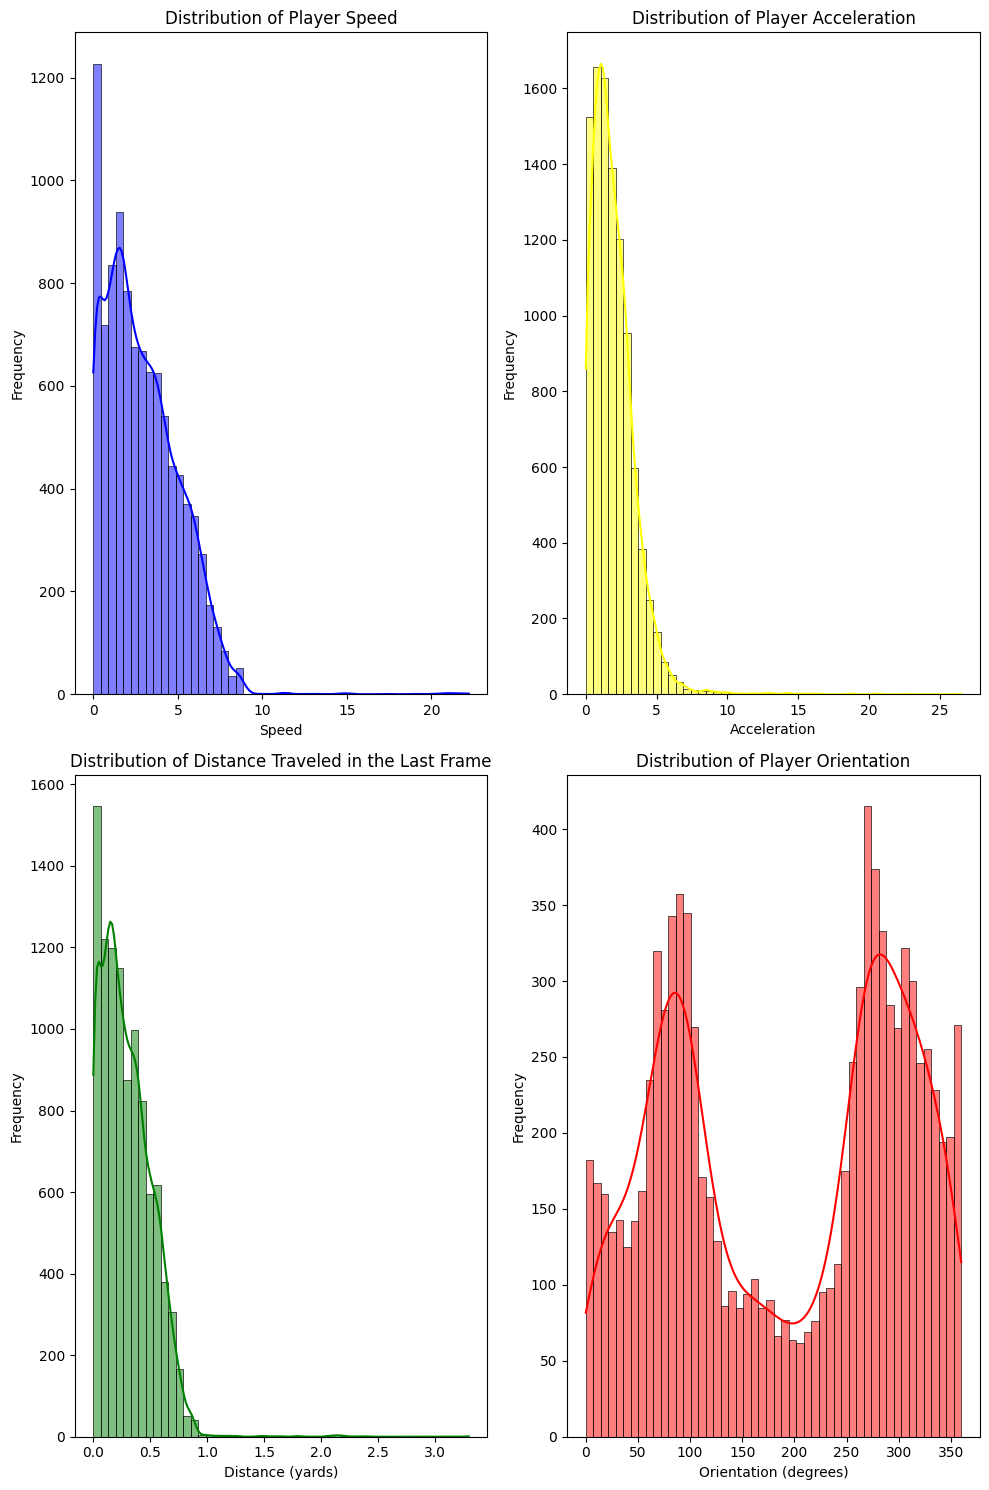

In [9]:
# Setting up the subplots for visualization
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 15))

# Distribution of 's' (Speed)

sns.histplot(tracking['s'], bins=50, kde=True, ax=axes[0][0], color='blue')
axes[0][0].set_title('Distribution of Player Speed')
axes[0][0].set_xlabel('Speed')
axes[0][0].set_ylabel('Frequency')

# Distribution of 'a' (Acceleration)
sns.histplot(tracking['a'], bins=50, kde=True, ax=axes[0][1], color='yellow')
axes[0][1].set_title('Distribution of Player Acceleration')
axes[0][1].set_xlabel('Acceleration')
axes[0][1].set_ylabel('Frequency')

# Distribution of 'dis' (Distance traveled in the last frame)
sns.histplot(tracking['dis'], bins=50, kde=True, ax=axes[1][0], color='green')
axes[1][0].set_title('Distribution of Distance Traveled in the Last Frame')
axes[1][0].set_xlabel('Distance (yards)')
axes[1][0].set_ylabel('Frequency')

# Distribution of 'o' (Orientation)
sns.histplot(tracking['o'], bins=50, kde=True, ax=axes[1][1], color='red')
axes[1][1].set_title('Distribution of Player Orientation')
axes[1][1].set_xlabel('Orientation (degrees)')
axes[1][1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
# Filtering out the football data
player_data = tracking[tracking['displayName'] != 'football']

# Filtering rows where the event column is not null
event_data = player_data.dropna(subset=['event'])

# Calculating average speed and acceleration for each event type
avg_speed_accel_by_event = event_data.groupby('event').agg({'s': 'mean', 'a': 'mean'}).reset_index()

# Sorting by average speed for better visualization
avg_speed_accel_by_event = avg_speed_accel_by_event.sort_values(by='s', ascending=False)

avg_speed_accel_by_event

,event,s,a
3,out_of_bounds,4.222273,1.843636
1,first_contact,3.764894,2.039734
4,pass_arrived,3.500152,2.040303
5,pass_outcome_caught,3.489924,2.013409
8,touchdown,3.247727,1.160909
2,handoff,3.025738,1.939672
7,tackle,2.856017,1.956710
6,run,2.616364,3.086364
0,ball_snap,0.522705,0.549098


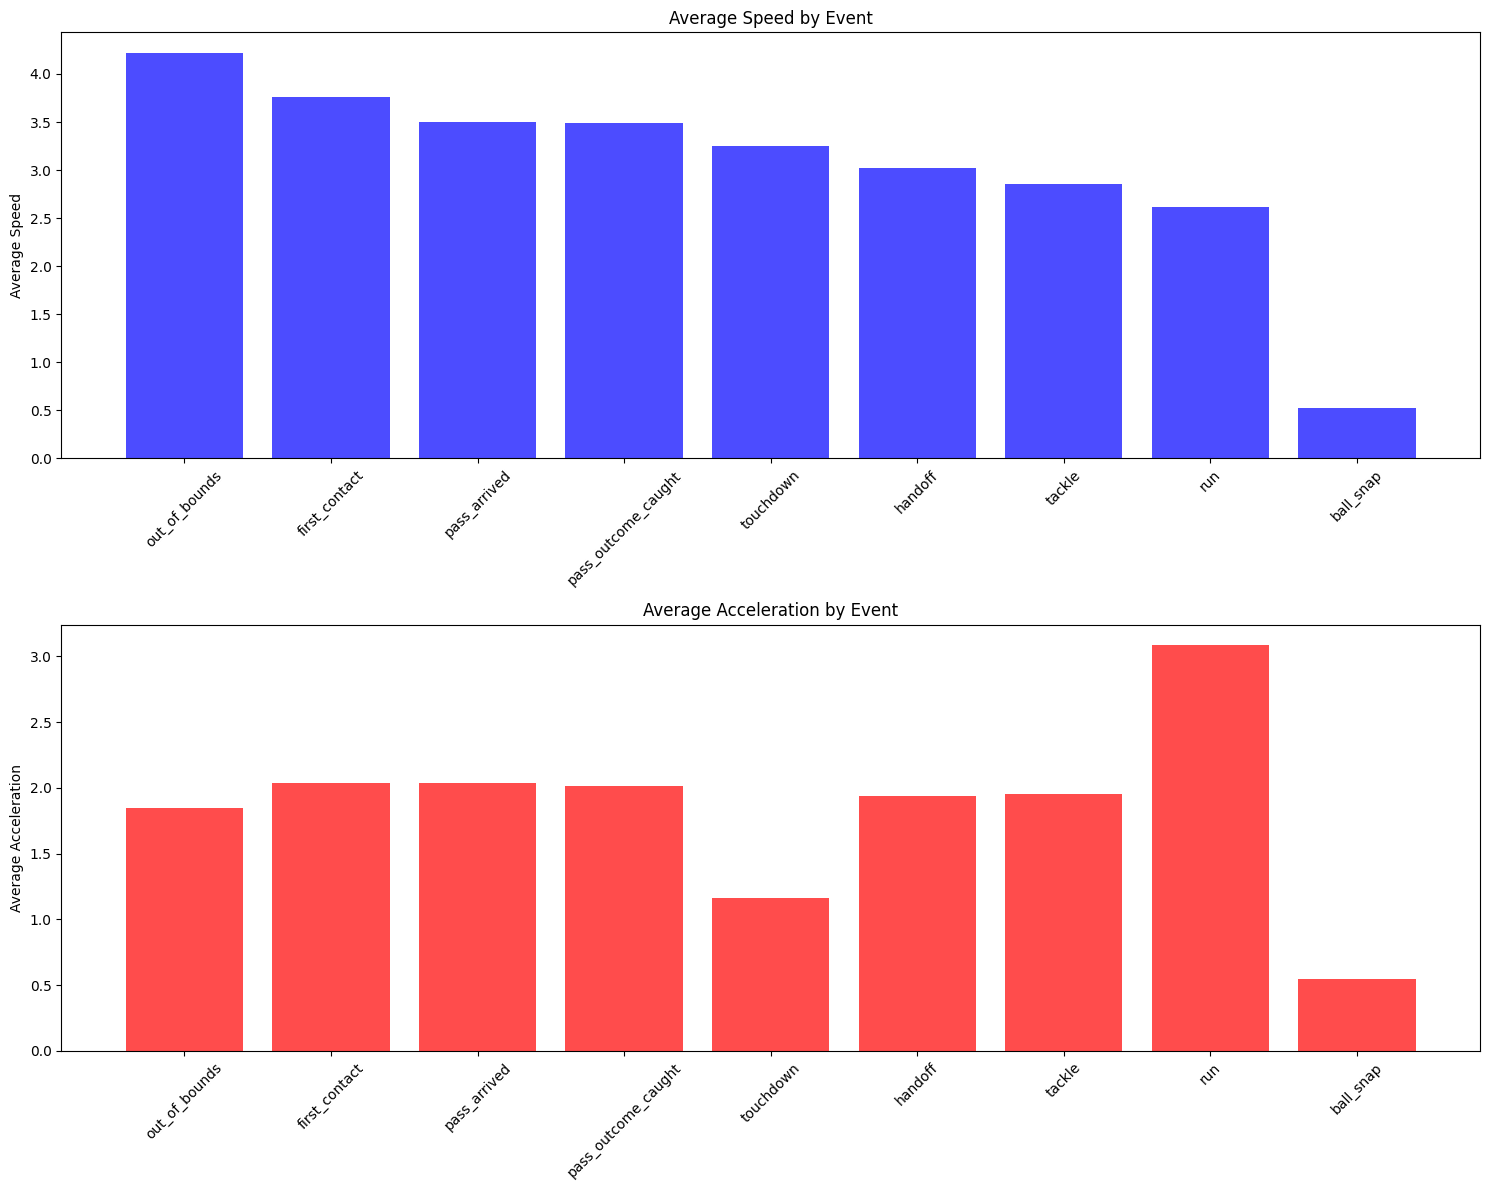

In [11]:
# Setting up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plotting average speed by event
ax[0].bar(avg_speed_accel_by_event['event'], avg_speed_accel_by_event['s'], color='blue', alpha=0.7)
ax[0].set_title('Average Speed by Event')
ax[0].set_ylabel('Average Speed')
ax[0].tick_params(axis='x', rotation=45)

# Plotting average acceleration by event
ax[1].bar(avg_speed_accel_by_event['event'], avg_speed_accel_by_event['a'], color='red', alpha=0.7)
ax[1].set_title('Average Acceleration by Event')
ax[1].set_ylabel('Average Acceleration')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [12]:
# Calculating the total number of frames for each player
player_playtime = player_data.groupby('displayName').agg({'frameId': 'count'}).reset_index()
player_playtime.columns = ['Player Name', 'Total Frames']

# Sorting players by playtime
top_players_playtime = player_playtime.sort_values(by='Total Frames', ascending=False).head(10)

top_players_playtime

,Player Name,Total Frames
41,Ryan Bates,302
42,Spencer Brown,302
37,Nick Scott,302
20,Greg Gaines,302
19,Gabe Davis,302
36,Mitch Morse,302
1,Aaron Donald,302
16,Dion Dawkins,302
14,Dawson Knox,302
40,Rodger Saffold,302


In [13]:
categorical_columns = plays.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['ballCarrierDisplayName', 'playDescription', 'possessionTeam',
       'defensiveTeam', 'yardlineSide', 'gameClock', 'passResult',
       'playNullifiedByPenalty', 'offenseFormation', 'foulName1'],
      dtype='object')


In [14]:
print(plays['foulName1'].value_counts())

foulName1
Offensive Holding                  210
Defensive Offside                   57
Defensive Holding                   51
Unnecessary Roughness               42
Ineligible Downfield Pass           42
Offensive Pass Interference         28
Face Mask                           28
Illegal Use of Hands                20
Roughing the Passer                 19
Illegal Contact                     18
Illegal Block Above the Waist       18
Illegal Formation                   13
Unsportsmanlike Conduct              9
Taunting                             6
Low Block                            6
Horse Collar Tackle                  5
Illegal Shift                        4
Disqualification                     3
Tripping                             3
Chop Block                           3
Illegal Motion                       2
Defensive Pass Interference          2
Illegal Blindside Block              1
Defensive Too Many Men on Field      1
Illegal Forward Pass                 1
Name: count, dt

In [15]:
tackles_red=tackles.drop(['gameId','playId'],axis=1)
tracking_red=week1.drop(['gameId','playId','frameId','time'],axis=1)
merged_data = tackles_red.merge(tracking_red, on='nflId', how='inner')
merged_data.head()

,nflId,tackle,assist,forcedFumble,pff_missedTackle,displayName,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,42816,1,0,0,0,Troy Hill,2.0,LA,left,72.34,7.81,4.36,0.91,0.43,338.33,257.23,NaN
1,42816,1,0,0,0,Troy Hill,2.0,LA,left,71.93,7.73,4.12,1.68,0.41,338.33,258.92,pass_arrived
2,42816,1,0,0,0,Troy Hill,2.0,LA,left,71.55,7.67,3.83,2.26,0.39,338.33,261.05,NaN
3,42816,1,0,0,0,Troy Hill,2.0,LA,left,71.20,7.63,3.50,2.78,0.36,335.57,263.84,NaN
4,42816,1,0,0,0,Troy Hill,2.0,LA,left,70.90,7.63,2.99,4.00,0.30,333.62,271.29,NaN


In [16]:
merged_dataset = pd.get_dummies(merged_data, columns=['event'], prefix='event', dummy_na=True)

# Dummy encode 'club' variable
merged_dataset = pd.get_dummies(merged_dataset, columns=['club'], prefix='club', dummy_na=True)

# Drop 'displayName' and 'jerseyNumber'
merged_dataset = merged_dataset.drop(['displayName', 'jerseyNumber'], axis=1)

In [17]:
merged_dataset = merged_dataset.sample(n=1000000, random_state=42)
target_variable=merged_dataset['tackle']
merged_dataset.columns

Index(['nflId', 'tackle', 'assist', 'forcedFumble', 'pff_missedTackle',
       'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir',
       'event_autoevent_ballsnap', 'event_ball_snap', 'event_first_contact',
       'event_fumble', 'event_fumble_defense_recovered',
       'event_fumble_offense_recovered', 'event_handoff', 'event_lateral',
       'event_line_set', 'event_man_in_motion', 'event_out_of_bounds',
       'event_pass_arrived', 'event_pass_forward', 'event_pass_outcome_caught',
       'event_pass_shovel', 'event_play_action', 'event_qb_sack',
       'event_qb_slide', 'event_run', 'event_run_pass_option', 'event_shift',
       'event_snap_direct', 'event_tackle', 'event_touchdown', 'event_nan',
       'club_ARI', 'club_ATL', 'club_BAL', 'club_BUF', 'club_CAR', 'club_CHI',
       'club_CIN', 'club_CLE', 'club_DAL', 'club_DEN', 'club_DET', 'club_GB',
       'club_HOU', 'club_IND', 'club_JAX', 'club_KC', 'club_LA', 'club_LAC',
       'club_LV', 'club_MIA', 'club_MIN', 'club_NE'

In [18]:
merged_dataset=merged_dataset.drop(['event_nan','club_nan'],axis=1)
merged_dataset.replace({True: 1, False: 0}, inplace=True)
merged_dataset.replace({'right': 1, 'left': 0}, inplace=True)
merged_dataset=merged_dataset.drop(['tackle','pff_missedTackle'],axis=1)

In [19]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(merged_dataset, target_variable, test_size=0.2, random_state=42)
logistic_reg_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg_model.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display additional evaluation metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.57752
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     84496
           1       0.58      1.00      0.73    115504

    accuracy                           0.58    200000
   macro avg       0.29      0.50      0.37    200000
weighted avg       0.33      0.58      0.42    200000



In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display additional evaluation metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.80271
              precision    recall  f1-score   support

           0       0.76      0.79      0.77     84496
           1       0.84      0.81      0.83    115504

    accuracy                           0.80    200000
   macro avg       0.80      0.80      0.80    200000
weighted avg       0.80      0.80      0.80    200000



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X= merged_dataset.drop(['x', 'y'], axis=1)
y = merged_dataset[['x', 'y']]
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y['x'], y['y'], test_size=0.2, random_state=42)

# Linear Regression model for y1
model_y1 = LinearRegression()
model_y1.fit(X_train, y1_train)
y1_pred = model_y1.predict(X_test)

# Linear Regression model for y2
model_y2 = LinearRegression()
model_y2.fit(X_train, y2_train)
y2_pred = model_y2.predict(X_test)

# Evaluate the models
r2_y1 = mean_squared_error(y1_test, y1_pred)
r2_y2 = mean_squared_error(y2_test, y2_pred)

print(f'MSE for x prediction: {r2_y1}')
print(f'MSE for y prediction: {r2_y2}')

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

n_estimators = [int(x) for x in np.linspace(start=10, stop=200, num=10)]
max_features = ['auto', 'sqrt', 'log2', None, 0.5, 0.8]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
random_state = [42]


# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'random_state': random_state
}

# Use RandomizedSearchCV to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=random_grid, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train, y_train)

# Print the best parameters
print(rf_random.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=30, max_features=sqrt, n_estimators=115, random_state=42; total time= 2.8min
[CV] END max_depth=30, max_features=sqrt, n_estimators=115, random_state=42; total time= 2.9min
[CV] END max_depth=90, max_features=auto, n_estimators=10, random_state=42; total time=   0.3s
[CV] END max_depth=90, max_features=auto, n_estimators=10, random_state=42; total time=   0.2s
[CV] END max_depth=90, max_features=auto, n_estimators=10, random_state=42; total time=   0.2s
[CV] END max_depth=20, max_features=None, n_estimators=10, random_state=42; total time=  58.0s
[CV] END max_depth=20, max_features=None, n_estimators=10, random_state=42; total time=  57.0s
[CV] END max_depth=30, max_features=sqrt, n_estimators=115, random_state=42; total time= 2.8min
[CV] END max_depth=20, max_features=None, n_estimators=10, random_state=42; total time=  57.4s
[CV] END max_depth=110, max_features=log2, n_estimators=200, random_state=42; tot

In [ ]:
only_tackles=merged_data[merged_data['tackle'] == 1]
club_counts = only_tackles['club'].value_counts()[:10]

# Plotting the bar chart
plt.bar(club_counts.index, club_counts.values)
plt.xlabel('Club Names')
plt.ylabel('Frequency of Tackle')
plt.title('Frequency of Tackle for Each Club')
plt.show()

In [22]:
rf_classifier = RandomForestClassifier(
    random_state=42,
    n_estimators=94,
    max_features=0.8,
    max_depth=10
)

# Fit the classifier to your training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier (you can use metrics like accuracy, precision, recall, etc.)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.88342


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84     84496
           1       0.83      1.00      0.91    115504

    accuracy                           0.88    200000
   macro avg       0.92      0.86      0.87    200000
weighted avg       0.90      0.88      0.88    200000



In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X= merged_dataset.drop(['x', 'y'], axis=1)
y = merged_dataset[['x', 'y']]
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y['x'], y['y'], test_size=0.2, random_state=42)

# Linear Regression model for y1
model_y1 = LinearRegression()
model_y1.fit(X_train, y1_train)
y1_pred = model_y1.predict(X_test)

# Linear Regression model for y2
model_y2 = LinearRegression()
model_y2.fit(X_train, y2_train)
y2_pred = model_y2.predict(X_test)

# Evaluate the models
r2_y1 = mean_squared_error(y1_test, y1_pred)
r2_y2 = mean_squared_error(y2_test, y2_pred)

print(f'MSE for x prediction: {r2_y1}')
print(f'MSE for y prediction: {r2_y2}')

MSE for x prediction: 545.3401323800032
MSE for y prediction: 96.49115241388174


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Assuming 'merged_dataset' is your DataFrame
X = merged_dataset.drop(['x', 'y'], axis=1)
y = merged_dataset[['x', 'y']]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Building the neural network model
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(6, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(2)  # No activation for regression
])

# Compiling the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error',  # Use mean squared error for regression
              metrics=['mean_squared_error'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluating the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {loss}')

Epoch 1/100
20000/20000 [==============================] - 8s 384us/step - loss: 319.2491 - mean_squared_error: 319.2491 - val_loss: 302.7987 - val_mean_squared_error: 302.7987
Epoch 2/100
20000/20000 [==============================] - 8s 376us/step - loss: 303.0282 - mean_squared_error: 303.0282 - val_loss: 301.2500 - val_mean_squared_error: 301.2500
Epoch 3/100
20000/20000 [==============================] - 8s 377us/step - loss: 300.8364 - mean_squared_error: 300.8364 - val_loss: 299.8510 - val_mean_squared_error: 299.8510
Epoch 4/100
20000/20000 [==============================] - 8s 376us/step - loss: 298.3450 - mean_squared_error: 298.3450 - val_loss: 296.2602 - val_mean_squared_error: 296.2602
Epoch 5/100
20000/20000 [==============================] - 8s 377us/step - loss: 297.2445 - mean_squared_error: 297.2445 - val_loss: 299.4471 - val_mean_squared_error: 299.4471
Epoch 6/100
20000/20000 [==============================] - 8s 379us/step - loss: 297.1525 - mean_squared_error: 297